In [1]:
import pandas as pd
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

df = pd.read_csv('./datasets/heart.csv')

In [2]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [4]:
def model_olustur(X, y):
    X_eğitim, X_test, y_eğitim, y_test =  train_test_split(X, y, test_size=0.20, random_state=111, stratify = y)
    logreg_model = LogisticRegression()
    logreg_model.fit(X_eğitim, y_eğitim)

    tahmin_eğitim = logreg_model.predict(X_eğitim)
    tahmin_test = logreg_model.predict(X_test)
    hata_matrisi_eğitim = confusion_matrix(y_eğitim, tahmin_eğitim)
    hata_matrisi_test = confusion_matrix(y_test, tahmin_test)
    print("Modelin doğruluk değeri : ",  logreg_model.score(X_test, y_test))
    print("Eğitim veri kümesi")
    print(classification_report(y_eğitim,tahmin_eğitim) )
    print("Test veri kümesi")
    print(classification_report(y_test,tahmin_test) )
    return  None

In [5]:
X = df.drop('target', axis=1)
y = df['target']
model_olustur(X,y)

Modelin doğruluk değeri :  0.7540983606557377
Eğitim veri kümesi
              precision    recall  f1-score   support

           0       0.91      0.78      0.84       110
           1       0.84      0.94      0.89       132

    accuracy                           0.87       242
   macro avg       0.88      0.86      0.86       242
weighted avg       0.87      0.87      0.87       242

Test veri kümesi
              precision    recall  f1-score   support

           0       0.76      0.68      0.72        28
           1       0.75      0.82      0.78        33

    accuracy                           0.75        61
   macro avg       0.76      0.75      0.75        61
weighted avg       0.75      0.75      0.75        61



**Örneklem Artırma**

In [6]:
from sklearn.utils import resample

In [7]:
normal_durum = df[df.target == 1]
hasta_durum = df[df.target == 0]

hasta_durum_artırılmış = resample(hasta_durum,
                                     replace = True,
                                     n_samples = len(normal_durum),
                                     random_state = 111)

artırılmıs_df = pd.concat([normal_durum, hasta_durum_artırılmış])
artırılmıs_df.target.value_counts()

1    165
0    165
Name: target, dtype: int64

In [8]:
X = artırılmıs_df.drop('target', axis=1)
y = artırılmıs_df['target']
model_olustur(X,y)

Modelin doğruluk değeri :  0.8787878787878788
Eğitim veri kümesi
              precision    recall  f1-score   support

           0       0.87      0.78      0.82       132
           1       0.80      0.89      0.84       132

    accuracy                           0.83       264
   macro avg       0.84      0.83      0.83       264
weighted avg       0.84      0.83      0.83       264

Test veri kümesi
              precision    recall  f1-score   support

           0       0.90      0.85      0.88        33
           1       0.86      0.91      0.88        33

    accuracy                           0.88        66
   macro avg       0.88      0.88      0.88        66
weighted avg       0.88      0.88      0.88        66



**Örneklem Azaltma**

In [9]:
normal_durum = df[df.target == 1]
hasta_durum = df[df.target == 0]

hasta_durum_azaltılmış = resample(normal_durum,
                                     replace = True,
                                     n_samples = len(hasta_durum),
                                     random_state = 111)

azaltılmış_df = pd.concat([hasta_durum, hasta_durum_azaltılmış])
azaltılmış_df.target.value_counts()

1    138
0    138
Name: target, dtype: int64

In [10]:
X = azaltılmış_df.drop('target', axis=1)
y = azaltılmış_df['target']
model_olustur(X,y)

Modelin doğruluk değeri :  0.8035714285714286
Eğitim veri kümesi
              precision    recall  f1-score   support

           0       0.91      0.84      0.87       110
           1       0.85      0.92      0.88       110

    accuracy                           0.88       220
   macro avg       0.88      0.88      0.88       220
weighted avg       0.88      0.88      0.88       220

Test veri kümesi
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        28
           1       0.79      0.82      0.81        28

    accuracy                           0.80        56
   macro avg       0.80      0.80      0.80        56
weighted avg       0.80      0.80      0.80        56



**SMOTE**

In [11]:
from imblearn.over_sampling import SMOTE

In [12]:
y = df.target
X = df.drop('target', axis=1)

sm = SMOTE(random_state=27)
X_smote, y_smote = sm.fit_sample(X, y)

In [13]:
model_olustur(X_smote, y_smote)

Modelin doğruluk değeri :  0.8939393939393939
Eğitim veri kümesi
              precision    recall  f1-score   support

           0       0.90      0.83      0.86       132
           1       0.84      0.91      0.87       132

    accuracy                           0.87       264
   macro avg       0.87      0.87      0.87       264
weighted avg       0.87      0.87      0.87       264

Test veri kümesi
              precision    recall  f1-score   support

           0       0.96      0.82      0.89        33
           1       0.84      0.97      0.90        33

    accuracy                           0.89        66
   macro avg       0.90      0.89      0.89        66
weighted avg       0.90      0.89      0.89        66



**ADASYN**

In [14]:
from imblearn.over_sampling import ADASYN

In [15]:
y = df.target
X = df.drop('target', axis=1)

ad = ADASYN(random_state=27)
X_adasyn, y_adasyn = ad.fit_sample(X, y)

ValueError: No samples will be generated with the provided ratio settings.

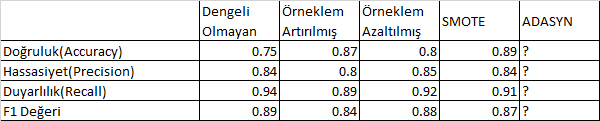
